# **Prediction of Product Sales**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

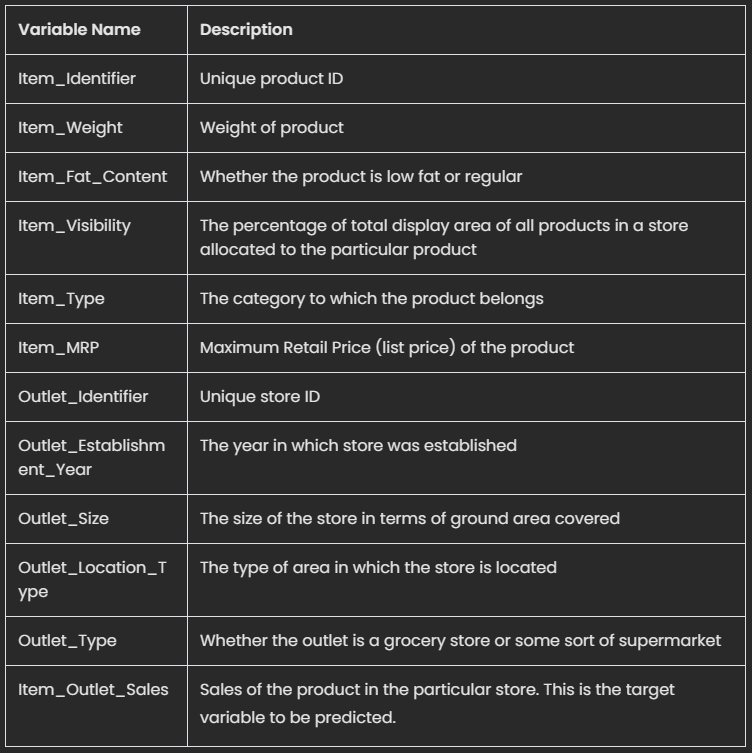

## **Imports**

In [6]:
#Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style('white')
import pandas as pd
import numpy as np
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**


In [7]:
#Load the data file
df= pd.read_csv('Data/sales_predictions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/sales_predictions.csv'

In [8]:
# Gathering parameters:
df.head()

NameError: name 'df' is not defined

In [ ]:
# Display index, columns, null count, and data types
df.info()

In [ ]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

## **Clean Data**


In [ ]:
df.dtypes

- #### All other data types are as they should be.

## Duplicated Data

In [ ]:
# Let's search for duplicated data:
df.duplicated().sum()

There are no duplicated data to drop.

## Missing Data

In [ ]:
# Let's search for missing data:
df.isna().sum()

- #### Identifying of missing data yields Weight (1463) and Size (2410) have missing data. Let's identifiy the percentage that is missing.

In [ ]:
df.isna().sum() / len(df) * 100

- #### Both Weight (17%) and Size (28%) have missing data and it would be best to drop these rows.

- **Missing 17.17% and 28.28% of values**
- **Strategy:**
 - Replace missing values with the median value of the column
- **Justification**
  - This is less affected by outliers than strategy = 'mean'.
  - However, for the Outlet_size, we can use the most frequented value.

In [ ]:
# Define the Item_Weight Mean.
median_Weight = df['Item_Weight'].median()

In [ ]:
## Replace the missing values with the column's 'median' value.
df['Item_Weight'].fillna(value = median_Weight, inplace = True)

In [ ]:
# Let's check out the Item_Weight column for missing data.
df.isna().sum()

In [ ]:
## And we will fill in the missing Outlet_Size data with "Unknown"
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [ ]:
# Now let's look for missing data.
df.isna().sum()

- #### We can confirm that now, there is no missing data.

## Fixing Data Types

## Inspecting Categorical Columns & Addressing Inconsistent Values

- #### We will now address the data types and make sure that they match the data dictionary.

In [ ]:
df.info()


In [ ]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

In [ ]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

In [ ]:
# Let's see what issues lie in the Item_Fat_Content label.
pd.set_option('display.max_rows', None)
df['Item_Fat_Content'].value_counts()

- #### Upon further investigating, "Item_Fat_Content" has inconsistant categories of data. Let's clean that up.

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

- #### And let's confirm it was changed.

In [ ]:
df['Item_Fat_Content'].value_counts()

In [ ]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- #### After further investigation of the categorical columns, there are zero inconsistencies with spelling or grammar of any categories.

### 'Item Identifier' Column

In [ ]:
## Display the unique values from the column
print(df['Item_Identifier'].unique())

In [ ]:
# Display Item Identifier value counts to look for any inconsistencies
df['Item_Identifier'].value_counts()

### 'Item Type' Column

In [ ]:
## Display the unique values from the column
print(df['Item_Type'].unique())

In [ ]:
# Display Item Type value counts to look for any inconsistencies
df['Item_Type'].value_counts()

### 'Outlet Identifier' Column

In [ ]:
## Display the unique values from the column
print(df['Outlet_Identifier'].unique())

### 'Outlet Size' Column

In [ ]:
## Display the unique values from the column
print(df['Outlet_Size'].unique())

### 'Outlet Location Type' Column

In [ ]:
## Display the unique values from the column
print(df['Outlet_Location_Type'].unique())

###'Outlet Type' Column

In [ ]:
## Display the unique values from the column
print(df['Outlet_Type'].unique())

## Summary Statistics for Numeric Features

In [ ]:
## Display the descriptive statistics for the numeric columns
df.describe(include= 'number')

### 'Item Weight' Column

In [ ]:
#Display Item Weight summary statistics
df['Item_Weight'].describe()

'Item Visibility' Column

In [ ]:
#Display Item Visibility summary statistics
df['Item_Visibility'].describe()

### 'Item MRP' Column

In [ ]:
#Display Item MRP summary statistics
df['Item_MRP'].describe()

### 'Item Outlet Sales' Column

In [ ]:
# Display Item Outlet Sales summary statistics
df['Item_Outlet_Sales'].describe()

## **Exploratory Data Analysis**


### Exploratory Visuals & Analysis

- #### To help illustrate the Production Sale data, we will produce visual aides in the form of charts.

 - Histogram to view the distributions of various features in your dataset.
 - Boxplot to view statistical summaries of various features in your dataset.
 - Heatmap of the correlation between features.

In [ ]:
# Checking info again before we proceed.
df.info()

 - For each numeric feature, we will plot the distribution and a boxplot.

In [ ]:
# Let's find out what those numeric featurs are:
num_cols = df.select_dtypes('number').columns
num_cols

### 'Item Weight' Column

In [ ]:
#Display the descriptive statistics for the column
df['Item_Weight'].describe()

 - Look at that! Going over "Item Weight", we can see that both the Mean (12.81342) and the Median (12.60000) weights are about equal.

## **Exploratory Data Analysis**


In [ ]:
## Using kind='box'
ax = df['Item_Weight'].plot(kind='box')

## Set the Title
ax.set_title('Item_Weight');

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

### 'Item Visibility' Boxplot

In [ ]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Visibility')
ax.set_xlabel('Item Visibility', fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold');


#### Since our end goal is to increase sales, let's produce a few charts that will help us to see the properties of products, and trends, that play a crucial role for the company.

In [ ]:
df.info()

## **Explanatory Data Analysis**

#### **Q1: Does MRP correlate to Sales?**
- What two variables can we use to visualize this data?
 - Item MRP vs Item Outlet Sales

#### **Q2: Does Fat Content increase or decrease sales?**
- What two variables can we use to visualize this data?
 - Item_Fat_Content vs Item Outlet Sales

#### **Q3: What is the trend for earnings for the last 3 years?**
- What two variables can we use to visualize this data?



In [ ]:
df.info()

#### **Q1: Does MRP correlate to Sales?**

In [ ]:
means = df.groupby('Item_Identifier')['Item_MRP'].mean().sort_values(ascending=False)
means

In [ ]:
## Define a MatplotLib ax object using sns.regplot()
ax = sns.regplot(x ='Item_MRP', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
## Set the Title
ax.set_title('Item Outlet Sales vs Item MRP', fontsize=16, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item MRP', fontsize=14, weight='bold')
ax.set_ylabel('Item Outlet Sales', fontsize=14, weight='bold')
price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.show()

#### **Q2: Does Fat Content increase or decrease sales?**

In [ ]:
means2 = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2

In [ ]:
## Define a MatplotLib ax object using sns.regplot()

ax = sns.regplot(x ='Item_Weight', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})

plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

## Set the Title
ax.set_title('Item Outlet Sales vs Item Weight',  fontsize=16, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item Weight', fontsize=14, weight='bold')
ax.set_ylabel('Item Outlet Sales', fontsize=14, weight='bold')
price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.show()

#### **Q3: Which Item type has the most sales?**

In [ ]:
df['Item_Type'].value_counts(normalize=True)

In [ ]:
# Set Color palette

df_sorted = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
colors = sns.color_palette("mako_r", n_colors=len(df_sorted))
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_sorted,
                 x='Item_Outlet_Sales',
                 y='Item_Type',
                 order=df_sorted['Item_Type'],
                 palette=colors)
ax.set_ylabel('Item Type', fontsize=14, weight='bold')
ax.set_xlabel('Item Outlet Sales', fontsize=14, weight='bold')
ax.set_title('Total Sales by Item Type', fontsize=16, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()

#### Preprocessing for Machine Learning

#### Imports

In [ ]:
# Importing Data:
df2 = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

### Reloading the Data

In [ ]:
df2.head()

### Performing Preprocessing Steps

Fixing Errors

In [ ]:
# Replace LF to 0, low fat to 0, Low Fat to 0, Regular to 1, reg to 1 in Item Fat Content column
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item Fat Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [ ]:
#Check value counts
df['Item_Fat_Content'].value_counts()

 - We have no column to drop.

In [ ]:
# Checking for Duplicates
df2.duplicated().sum()

 - We have no duplicates.

In [ ]:
# Checking missing values
df2.isna().sum()

In [ ]:
# Redoing what was done far above.
i_mean = np.mean(df["Item_Weight"])
# replacing missing values with Item_Weight average
df2['Item_Weight'].fillna(value = i_mean, inplace = True)
# filling in missing data in the Outlet_Size solumn
df2['Outlet_Size'].fillna(value = "Unknown", inplace = True)
# double checking to see if the missing data has been filled in Outlet_Size
df2.isna().sum()

In [ ]:
df2.info()

#### Defining X and y

In [ ]:
#Defining my Target variable which is y and the remaining features X
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

#### Train-Test-Split

In [ ]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X_train.info()

In [ ]:
X_test.info()

### Preparing Data

### Column Selectors

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

### Transformers

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#### Making a Preprocessing Pipeline

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

## Maching Learning - Training the Models

### Imports for Machine Learning

In [ ]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
preprocessor

### Data Fitting and Scaler

In [ ]:
# fit on train
preprocessor.fit(X_train)

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
X_train_processed

In [ ]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

### Convert Preprocessed Array to Dataframes

In [ ]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

In [ ]:
X_train_processed_df = pd.DataFrame(X_train_processed,
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed,
                         columns = cols,
                         index = X_test.index)

In [ ]:
cols

In [ ]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
# Check the data types
print(f'\nThe datatypes are {X_train_processed_df.dtypes}')
X_train_processed

In [ ]:
#View the transformations
X_train_processed_df.describe().round(2)

In [ ]:
#View the transformations
X_test_processed_df.describe().round(2)

### Fitting a Linear Regression Model

In [ ]:
# Create an instance of the model
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)

reg_pipe.fit(X_train, y_train)

In [ ]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)

## Measuring Model Performance with R Squared

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [ ]:
## Measuring model performance - using builtin .score()
print(f"Train R-Squared: { round( reg_pipe.score(X_train, y_train),2) }")
print(f"Test R-Squared: { round( reg_pipe.score(X_test, y_test),2) }")

## Measuring Model Performance with RMSE

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
# get predictions for train and test data
y_hat_train = reg_pipe.predict(X_train)
y_hat_test = reg_pipe.predict(X_test)

In [ ]:
## Get RMSE for train vs test
rmse_train =  mean_squared_error(y_train, y_hat_train, squared=False)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

## Regression Tree Model

In [ ]:
##Baseline
dec_tree = DecisionTreeRegressor(random_state = 42)

#### Training Model and Predictions

In [ ]:
dec_tree.fit(X_train_processed, y_train)

In [ ]:
#Predict target values for training and test set
#Predict target values for training and test set
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
# Evaluate the model using default Metrics
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(f'Decision Tree Default Train R2 Score: {train_score}')
print(f'Decision Tree Default Test R2 Score: {test_score}')

## And we can fine-tune the Model

In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()

#### But, we do not know the depth of tree, and the leaves. Let's find that out.

In [ ]:
# Default tree Depth?
dec_tree.get_depth()

In [ ]:
# Default leaf nodes?
dec_tree.get_n_leaves()

### Let's make a visual of the tree depths. To understand it better.

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 44)) # will try every value between 2 and 44
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)


In [ ]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

### Best version to use

The best maximum depth, seen above, is 5. Let's set that as the max depth.

In [ ]:
 # Set max depth to 5
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(f'Decision Tree Tuned Train Score: {train_5_score}')
print(f'Decision Tree Tuned Test Score: {test_5_score}')

### Measuring Model Performance with RMSE

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
# get predictions for train and test data
y_hat_train = dec_tree_5.predict(X_train_processed_df)
y_hat_test = dec_tree_5.predict(X_test_processed_df)

In [ ]:
# get predictions for train and test data
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
## Get RMSE for train vs test
rmse_train =  mean_squared_error(y_train, train_preds, squared=False)
rmse_test = mean_squared_error(y_test, test_preds, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

In [ ]:
y_pred = dec_tree_5.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Decision Tree Model Testing Mean Absolute Error: {mae}')
print(f'Decision Tree Model Testing Mean Squared Error: {mse}')
print(f'Decision Tree Model Testing Root Mean Squared Error: {rmse}')
print(f'Decision Tree Model Testing R-squared: {r2}')

#### For The Stakeholders:

- By using the Mean Absolute Model, we can see the error has the lowest. We can utilize that to make future predictions.

# Project 1 Revisited

## Load Data/Libraries

In [9]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance

## saving variables
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [10]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data/sales_predictions.csv'

## Set Visualization Style

In [ ]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

## Clean Data
### Object Inconsistencies

In [ ]:
object_type = df.dtypes[df.dtypes == 'object']
for i in object_type.index:
  print(i, '---')
  print(df[i].unique())
  print("")

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].unique()

## Preprocess

In [ ]:
df.head(3)

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [ ]:
cat_select = make_column_selector(dtype_include='object')
cat_select(X_train)

In [ ]:
num_select = make_column_selector(dtype_include='number')
num_select(X_train)

In [ ]:
for col in cat_select(X_train):
    print(f'{col}:\n{df[col].unique()}\n')

In [ ]:
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(drop='first', sparse=False))

num_pipe = make_pipeline(SimpleImputer(strategy='median'))

In [ ]:
preprocessor = make_column_transformer((cat_pipe, cat_select),
                                       (num_pipe, num_select),
                                       verbose_feature_names_out=False)
preprocessor

In [ ]:
preprocessor.fit(X_train)

feature_names = preprocessor.get_feature_names_out()
feature_names

In [ ]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns=feature_names,
                          index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=feature_names,
                          index=X_test.index)

In [ ]:
X_test_df.head(3)

In [ ]:
y_test.head(3)

## Custom Functions

In [ ]:
def evaluate_regression(model, X_train=X_train_df,y_train=y_train, X_test=X_test_df, y_test=y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [ ]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True, permutation=False, random_state=42,
                   X_train=X_train_df, y_train=y_train):
    
    r = permutation_importance(model, X_train, y_train, n_repeats =5, 
                                   random_state = random_state)
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
        
    if permutation==True:        
        importances = pd.Series(r['importances_mean'],index=X_train.columns,
                           name = 'permutation importance')
    
        # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [ ]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [ ]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, color_rest='#006ba4', color_top='green',
                          top_important=5, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        highlight_feats = importances.sort_values(ascending=True).tail(top_important).index
        colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}        
        colors = plot_vals.index.map(colors_dict)
        
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [ ]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [ ]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')    

    
    if annotate == True:
            for bar in ax.patches:
                ## calculate center of bar
                bar_ax = bar.get_y() + bar.get_height() / 2
                ## get the value to annotate
                val = bar.get_width()

                # handle negative values by setting them to position 0
                if val < 0:
                    val_pos = 0
                else:
                    val_pos = val        
        
                # ha and va stand for the horizontal and vertical alignment
                ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                            ha=ha, va=va, size=size,
                            xytext=xytext, textcoords=textcoords)
    return ax

## Linear Regression Coefficient Visualization and Interpretation

In [ ]:
linreg = LinearRegression()

linreg.fit(X_train_df, y_train)
evaluate_regression(linreg)

## Extract Coefficients and Visualize

In [ ]:
coeff = get_coeffs_linreg(linreg)
coeff

In [ ]:
plot_coeffs(coeff, top_n=15, annotate=True);

### Interpret Top 3 Most Impactful Features

'Outlet_Type_Supermarket Type1':

If the Outlet Type is Supermarket Type 1, increase in target value by 936.702
'Outlet_Identifier_OUT027':

If the Outlet Identifier is OUT027, increase in target value by 907.157
'Outlet_Type_Supermarket Type3':

If the Outlet Type is Supermarket Type 3, increase in target value by 907.157
The most impactful features are object type

## RandomForest Default Feature Importance

In [ ]:
cat_pipe_rf = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                            OneHotEncoder(drop='if_binary', sparse=False))

In [ ]:
preprocessor_rf = make_column_transformer((cat_pipe_rf, cat_select), 
                                        (num_pipe, num_select),
                                        verbose_feature_names_out=False)
preprocessor_rf

In [ ]:
preprocessor_rf.fit(X_train)

feature_names_rf = preprocessor_rf.get_feature_names_out()
feature_names_rf

In [11]:
X_train_rf = pd.DataFrame(preprocessor_rf.transform(X_train), columns=feature_names_rf,
                          index=X_train.index)
X_test_rf = pd.DataFrame(preprocessor_rf.transform(X_test), columns=feature_names_rf,
                          index=X_test.index)
X_test_rf.head(3)

NameError: name 'preprocessor_rf' is not defined

In [ ]:
y_test.head(3)

In [ ]:
print(len(X_test_rf.columns))
len(X_test_df.columns)

In [ ]:
rf = RandomForestRegressor(random_state=SEED)

rf.fit(X_train_rf, y_train)
evaluate_regression(rf, X_train=X_train_rf, X_test=X_test_rf)

## Extract and Evaluate Feature Importance

In [12]:
importances_def = get_importances(rf, feature_names=None,name='Feature Importance',
                   sort=True, ascending=False, permutation=False, random_state=SEED,
                   X_train=X_train_rf, y_train=y_train)
importances_def

NameError: name 'get_importances' is not defined

In [ ]:
plot_importance_color(importances_def, top_n=15,  figsize=(8,6), 
                          color_dict=None, color_rest='#006ba4', color_top='green',
                          top_important=5, ax=None)
plt.title('Default Importances');

Top 5 most important
- 'Item_MRP'
- 'Outlet_Type_Grocery Store'
- 'Item_Visibility'
- 'Item_Weight'
- 'Outlet_Identifier_OUT027'

## RandomForest Permutation Feature Importance

In [13]:
importances_perm = get_importances(rf, feature_names=None,name='Feature Importance',
                   sort=True, ascending=False, permutation=True, random_state=SEED,
                   X_train=X_train_rf, y_train=y_train)
importances_perm

NameError: name 'get_importances' is not defined

In [ ]:
color_top5 = get_color_dict(importances_def, color_rest='#006ba4' , color_top='green',
                    top_n=5)

In [ ]:
plot_importance_color(importances_perm, top_n=15,  figsize=(8,6), 
                          color_dict=color_top5, color_rest='#006ba4', color_top='green',
                          top_important=5)

plt.title('Permutation Importances');

Top 5 Most Important:
- 'Item_MRP'
- 'Outlet_Type_Grocery Store'
- 'Item_Visibility'
- 'Item_Weight'
- 'Outlet_Identifier_OUT027'

## Serializing Variables

In [14]:
export = {'X_train_df':X_train_df,
          'X_train_rf':X_train_rf,          
          'y_train': y_train,
          
          'X_test_df':X_test_df,
          'X_test_rf': X_test_rf,
          'y_test': y_test,
          
          'preprocessor':preprocessor,
          'preprocessor_rf':preprocessor_rf,
          'LinearRegression':linreg,
          'RandomForest':rf}
joblib.dump(export, 'Data/best_models.joblib')

NameError: name 'X_train_df' is not defined

In [ ]:
loaded = joblib.load('Data/best_models.joblib')
loaded.keys()